## Day 35 Lecture 1 Assignment

In this assignment, we will learn about gradient boosting. We will use a dataset describing survival rates after breast cancer surgery loaded below and analyze the model generated for this dataset.

In [1]:
!pip install scikit-optimize

     |████████████████████████████████| 102kB 5.2MB/s 


In [17]:

%matplotlib inline
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
# Attributes:
# Age of patient at time of operation (numerical)
# Patient's year of operation (year - 1900, numerical)
# Number of positive axillary nodes detected (numerical)
# Survival status (class attribute)
#  -- 1 = the patient survived 5 years or longer
#  -- 2 = the patient died within 5 year

cols = ['age', 'op_year', 'nodes', 'survival']
cancer = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/haberman.data', names=cols)

In [30]:
cancer.head()

,age,op_year,nodes,survival
0,30,64,1,0
1,30,62,3,0
2,30,65,0,0
3,31,59,2,0
4,31,65,4,0


Check for missing data and remove all rows containing missing data

In [4]:
# answer below:
#There are no missing values
def missingness_summary(df,print_log,sort):
  percentage_null = df.isnull().sum()*100/df.isnull().count()
  if sort == 'ascending':
    return percentage_null.sort_values()
  elif sort == 'descending':
    return percentage_null.sort_values(ascending=False)
  else: 
    return percentage_null


cancer_missing = missingness_summary(cancer,0,'descending')
print(cancer_missing)

survival    0.0
nodes       0.0
op_year     0.0
age         0.0
dtype: float64


Adjust the target variable so that it has values of either 0 or 1

In [5]:
# answer below:
cancer['survival'] = np.where(cancer['survival'] == 1, [0], [1])

Split the data into train and test (20% in test)

In [6]:
# answer below:
X = cancer.drop(['survival'], axis=1)
y = cancer.survival

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=42)

Create a gradient boosted classification algorithm with a learning rate of 0.01 and max depth of 5. Report the accuracy.

In [7]:
# answer below:
grad = GradientBoostingClassifier(learning_rate=0.01, max_depth=5)
grad.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=5,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [22]:
print(grad.score(X_train, y_train))

0.8852459016393442


Print the confusion matrix for the test data. What do you notice about our predictions?

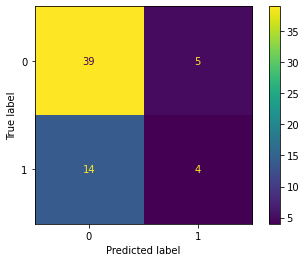

In [12]:
# answer below:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(grad, X_test, y_test)


Print the confusion matrix for a learning rate of 1 and a learning rate of 0.5. What do you see now that stands out to you in the confusion matrix?

In [14]:
# answer below:

grad1 = GradientBoostingClassifier(learning_rate=1)
grad05 = GradientBoostingClassifier(learning_rate=0.05)
grad1.fit(X_train, y_train)
grad05.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

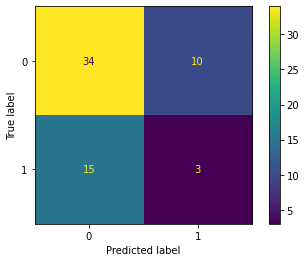

In [15]:
plot_confusion_matrix(grad1, X_test, y_test)

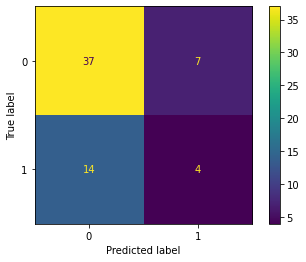

In [16]:
plot_confusion_matrix(grad05, X_test, y_test)

Perform a grid search for the optimal learning rate. Instead of accuracy, use a metric that will help your model predict the positive class.

In [21]:
# answer below:
from sklearn.model_selection import GridSearchCV

param= {'learning_rate': [0.01, .1, .05, 0.75, 1]}

gradclass = GradientBoostingClassifier()

grid = GridSearchCV(gradclass, param_grid=param, scoring='recall', cv=5)

grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
         

In [22]:
grid.best_params_

{'learning_rate': 0.1}

List the feature importances for the model with the optimal learning rate.

In [31]:
# answer below:
pd.Series(grid.best_estimator_.feature_importances_, index=X_train.columns).sort_values(ascending=False).head(2)

nodes    0.464505
age      0.335530
dtype: float64

In [ ]:
#I did not scale X, and we have a small sample (bit more than 300), 3 variables. 